In [120]:
!pip install konlpy # 한글 형태소 분석
!pip install nltk   # 말뭉치 자료

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
%config InlineBackend.figure_format = 'retina'

In [122]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [123]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rc
import seaborn as sns
import matplotlib as mpl 
from konlpy.tag import Okt # 형태소분석기 : Openkoreatext
import nltk 
from konlpy.corpus import kolaw
from collections import Counter # 빈도 수 세기
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [124]:
import matplotlib.font_manager as fm
fontpath = 'usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath,size=9)
plt.rc('font',family='NanumBarunGothic')
mpl.font_manager._rebuild()

In [125]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1-1. 고용부담금 전체 워클

In [126]:
df = pd.read_csv("워드클라우드교육청장애인고용.csv")
wc = df['내용_word']
wc.head(2)

0    ['지난해', '2', '2년', '년', '연속', '우수', '우수기관', '기...
1    ['충북', '충북교육청', '교육청', '직업', '충북장애인', '장애인', '...
Name: 내용_word, dtype: object

In [128]:
wc.to_csv("교육청장애인.txt",encoding='utf-8-sig')

In [129]:
text = open('교육청장애인.txt',encoding='utf-8-sig').read()
spwords = set(STOPWORDS)

In [130]:
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

In [131]:
noun = token_konlpy(text)

In [139]:
# 불용어 정의
stop_words = ['고용', '장애인','부담', '의무', '경우', '개월', '올해', '지난해', '대신', '이번', '결과','교육청','교육','한국']
# 형태소 분석 결과에서 불용어를 제거
tokens_ko = [each_word for each_word in noun if each_word not in stop_words]
tokens_ko

['내용',
 '연속',
 '우수',
 '우수',
 '기관',
 '기관',
 '선정',
 '충북',
 '충북',
 '일보',
 '일보',
 '충북',
 '중증',
 '증장',
 '애인',
 '생산품',
 '생산품',
 '우선',
 '우선',
 '구매',
 '구매',
 '증장',
 '애인',
 '생산품',
 '보건',
 '보건복지부',
 '장관',
 '복지',
 '장관',
 '지정',
 '증장',
 '애인',
 '생산',
 '생산',
 '시설',
 '시설',
 '사무',
 '사무',
 '용지',
 '용지',
 '화장지',
 '재생',
 '재생',
 '토너',
 '토너',
 '충북',
 '충북',
 '직업',
 '충북',
 '재활',
 '재활',
 '시설',
 '협회',
 '시설',
 '협회',
 '주관',
 '중증',
 '증장',
 '애인',
 '생산품',
 '생산품',
 '우선',
 '우선',
 '구매',
 '구매',
 '우수',
 '우수',
 '기관',
 '기관',
 '증장',
 '애인',
 '생산품',
 '보건',
 '보건복지부',
 '장관',
 '복지',
 '장관',
 '지정',
 '증장',
 '애인',
 '생산',
 '생산',
 '시설',
 '제품',
 '중부',
 '윤지',
 '윤지',
 '기자',
 '세종',
 '세종시',
 '내년',
 '일자리',
 '일자리',
 '사업',
 '사업',
 '기간',
 '근로자',
 '선발',
 '응시',
 '응시',
 '자격',
 '자격',
 '증장',
 '애인',
 '촉진',
 '촉진',
 '직업',
 '직업',
 '재활',
 '재활',
 '시행',
 '이상',
 '이전',
 '부산',
 '부산',
 '여가',
 '여가부',
 '폭력',
 '폭력',
 '예방',
 '예방',
 '우수',
 '우수',
 '기관',
 '기관',
 '선정',
 '남부',
 '발전',
 '남부',
 '발전',
 '재난',
 '재난대응',
 '대응',
 '안전',
 '훈련',
 '훈련',
 '대응',
 '강화',
 '차별',
 '문화',


In [140]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(10)

[('공단', 2537),
 ('훈련', 1379),
 ('직업', 1297),
 ('센터', 1213),
 ('기관', 1019),
 ('협약', 922),
 ('장애', 911),
 ('학생', 900),
 ('업무', 874),
 ('지원', 867)]

In [147]:
# 단어별 출현 횟수가 많은 순서대로 워드클라우드로 표현할 단어를 추출하고 딕셔너리 형태로 만든다.
data = ko.vocab().most_common(200)
tmp_data = dict(data)
tmp_data

{'공단': 2537,
 '훈련': 1379,
 '직업': 1297,
 '센터': 1213,
 '기관': 1019,
 '협약': 922,
 '장애': 911,
 '학생': 900,
 '업무': 874,
 '지원': 867,
 '학교': 643,
 '공무원': 636,
 '발달': 566,
 '사업': 524,
 '인천': 504,
 '특수': 446,
 '체결': 446,
 '운영': 443,
 '발달장애': 437,
 '채용': 412,
 '경기도': 406,
 '서울시': 405,
 '확대': 390,
 '지사': 377,
 '일자리': 371,
 '체험': 364,
 '경기': 355,
 '취업': 355,
 '설립': 354,
 '경북': 349,
 '교육감': 340,
 '근로자': 336,
 '촉진': 311,
 '지역': 309,
 '교원': 304,
 '울산': 303,
 '개발': 300,
 '의원': 292,
 '전국': 278,
 '대상': 277,
 '사회': 275,
 '비율': 272,
 '서울': 265,
 '정부': 251,
 '행정': 250,
 '진로': 244,
 '부산': 240,
 '시도': 239,
 '애인': 236,
 '추진': 233,
 '공공': 233,
 '재활': 231,
 '고용부': 230,
 '현장': 226,
 '제공': 221,
 '지방': 221,
 '기준': 220,
 '증장': 218,
 '대전': 218,
 '노동부': 218,
 '자치': 218,
 '편의': 217,
 '능력': 215,
 '중증': 209,
 '단체': 203,
 '고용노동부': 200,
 '부문': 194,
 '계획': 190,
 '복지': 188,
 '경남': 188,
 '공공기관': 187,
 '광주시': 184,
 '직원': 184,
 '위원회': 183,
 '특별': 183,
 '전시': 176,
 '특수교육': 174,
 '전문': 169,
 '광주': 164,
 '희망': 163,
 '시설': 161,
 '세종

In [144]:
mask = np.array(Image.open('cloud.png'))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [143]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(120,217),np.random.randint(26,32),np.random.randint(45,80)))


In [148]:
wc = WordCloud(font_path='NanumGothic.ttf', background_color = 'white', color_func = color_func, max_words = 200, mask = mask) # 워드클라우드 설정
wordcloud = wc.generate_from_frequencies(tmp_data)
wordcloud.words_

{'공단': 1.0,
 '훈련': 0.5435553803705163,
 '직업': 0.5112337406385494,
 '센터': 0.47812376823019315,
 '기관': 0.40165549862041783,
 '협약': 0.36342136381553014,
 '장애': 0.35908553409538824,
 '학생': 0.35474970437524633,
 '업무': 0.3445013795821837,
 '지원': 0.3417422152148207,
 '학교': 0.25344895545920376,
 '공무원': 0.25068979109184075,
 '발달': 0.2230981474182105,
 '사업': 0.20654316121403232,
 '인천': 0.19865983445013796,
 '특수': 0.1757981868348443,
 '체결': 0.1757981868348443,
 '운영': 0.17461568782026016,
 '발달장애': 0.17225068979109184,
 '채용': 0.1623965313362239,
 '경기도': 0.16003153330705558,
 '서울시': 0.15963736696886086,
 '확대': 0.15372487189594009,
 '지사': 0.14860070949940876,
 '일자리': 0.14623571147024045,
 '체험': 0.1434765471028774,
 '경기': 0.13992905005912495,
 '취업': 0.13992905005912495,
 '설립': 0.13953488372093023,
 '경북': 0.13756405202995664,
 '교육감': 0.13401655498620418,
 '근로자': 0.13243988963342532,
 '촉진': 0.12258573117855735,
 '지역': 0.12179739850216792,
 '교원': 0.11982656681119433,
 '울산': 0.1194324004729996,
 '개발': 0.1

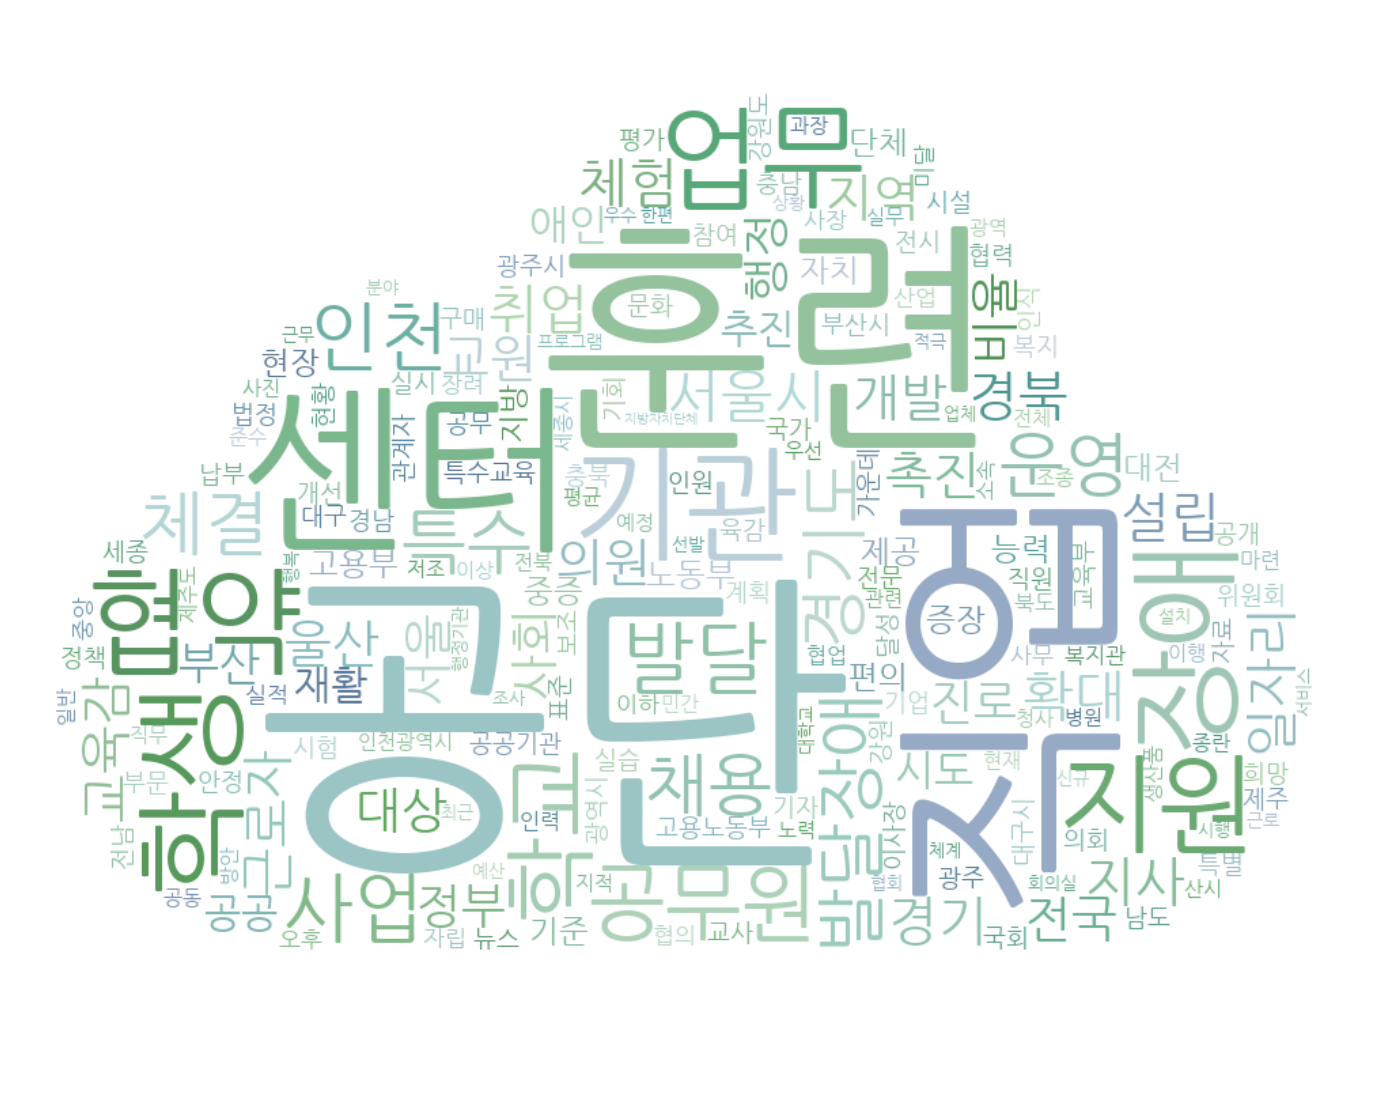

In [149]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation(보간법)
plt.axis('off') # 그래프 눈금을 숨긴다.
plt.show()

In [74]:
df2021 = df[df['날짜'] > '2020-12-31']
df2021

,Unnamed: 0,Unnamed: 0.1,뉴스타이틀,날짜,내용,링크,타이틀_word,내용_word
0,0,0,“제보할 게 있는데요”…시청자와 함께 만든 2021년 뉴스,2021-12-31,"장애인 고용 부담금을 피하려 장애인 직원을 허위 등록했던 병원은 KBS 보도 이후,...",https://news.kbs.co.kr/news/view.do?ncd=536225...,"['제', '시청자', '2021', '2021년', '년', '뉴스']","['장애인', '고용', '부담금', '직원', '허위', '등록', '병원', '..."
1,1,1,타다가 포기한 ‘플랫폼 운송사업’ 최초 3개사는 어디?,2021-12-31,또 코액터스는 장애인표준사업장으로 지정돼 있어 장애인고용부담금 납부 의무가 있는 기...,http://byline.network/?p=9004111222465556,"['포기', '플랫폼', '운송', '운송사업', '사업', '최초', '3', '...","['코', '코액', '액', '장애인', '장애인표준사업장', '표준', '사업장..."
2,2,2,"[신년사] 안경덕 ""내년 취약분야 고용안정 적극 지원하겠다""",2021-12-31,청년·여성·장애인 등 대상별 노동시장 진입을 위한 맞춤형 일자리 지원도 더욱 강화하...,http://www.wowtv.co.kr/NewsCenter/News/Read?ar...,"['신년사', '안경', '안경덕', '덕', '내년', '취약', '취약분야', ...","['청년', '여성', '장애인', '등', '대상', '노동', '노동시장', '..."
3,3,3,"[신년사] 안경덕 고용부 장관 ""좋은 일자리 확대…취약분야 고용안정 지원""",2021-12-31,"아울러 그는 ""공공부문 장애인 의무고용률을 3.6%로 0.2%p 상향하고, 채용장려...",http://www.newspim.com/news/view/20211231000659,"['신년사', '안경', '안경덕', '덕', '고용', '고용부', '부', '장...","['그', '공공', '공공부문', '부문', '장애인', '의무', '의무고용',..."
4,4,4,[신년사] 안경덕 “내년 반구십리 자세로 성과 체감도 높여나갈 것”,2021-12-31,공공부문 장애인 의무고용률을 3.6%로 0.2%포인트 상향하고 채용장려금을 신설해 ...,https://www.viva100.com/main/view.php?key=2021...,"['신년사', '안경', '안경덕', '덕', '내년', '반구', '반구십리', ...","['공공', '공공부문', '부문', '장애인', '의무', '의무고용', '고용'..."
...,...,...,...,...,...,...,...,...
1105,1106,1106,"[2021 새해부터 달라지는 제도 (2)] 고등학교 무상교육 실시되고, 7급 공무원...",2021-01-02,적용되고 장애인 고용부담금 부담기초액 인상돼 고용노동부는 2020년 12월 10일부...,https://www.news2day.co.kr/article/20201231500161,"['2021', '새', '제도', '2', '고등', '고등학교', '학교', '...","['적용', '장애인', '고용', '고용부담금', '부담금', '부담', '부담기..."
1106,1107,1107,"최저임금 시급 8720원, 국민취업지원제도 시행",2021-01-02,이외 올해부터 300인 이상 사업주의 직장 내 장애인 인식개선 교육 실시 기준이 강...,http://www.gjdream.com/news/articleView.html?i...,"['최저', '최저임금', '임금', '시급', '8720', '8720원', '원...","['이외', '올해', '300', '300인', '인', '이상', '사업', '..."
1107,1108,1108,"고용/노동계, 2021년부터 달라지는 것들!",2021-01-02,기타 올해부터 300인 이상 사업주의 직장 내 장애인 인식개선 교육 실시 기준이 강...,http://www.kjdaily.com/read.php3?aid=160954416...,"['고용', '노동계', '2021', '2021년', '년']","['기타', '올해', '300', '300인', '인', '이상', '사업', '..."
1108,1109,1109,"최저임금 8720원·국민취업지원제...고용·노동계, 새해 달라지는 것들",2021-01-02,올해부터 300인 이상 사업주의 직장 내 장애인 인식개선 교육 실시 기준이 강화되고...,http://www.slist.kr/news/articleView.html?idxn...,"['최저', '최저임금', '임금', '8720', '8720원', '원', '국민...","['올해', '300', '300인', '인', '이상', '사업', '사업주의',..."


In [75]:
df2020 = df[df['날짜'] < '2021-01-01']
df2020

,Unnamed: 0,Unnamed: 0.1,뉴스타이틀,날짜,내용,링크,타이틀_word,내용_word
1110,1111,1111,[새해 달라지는 것] 다주택자 '세금 폭탄' 종부세 최고 두배 오른다,2020-12-31,고용한 장애인 수가 고용의무인원에 미달하는 경우 납부해야 하는 장애인 고용부담금의 ...,http://www.joongboo.com/news/articleView.html?...,"['새해', '주택자', '세금', '폭탄', '종', '종부세', '부세', '최...","['고용', '장애인', '수가', '고용의무인원', '의무', '인원', '미달'..."
1111,1112,1112,"고용노동부 울산지청, 2021년 달라지는 고용노동정책",2020-12-31,'장애인 고용부담금'이 2020년부터 국가 및 지자체의 공무원 부문에도 적용됐으므로...,https://www.sisa-news.com/news/article.html?no...,"['고용', '고용노동부', '노동부', '울산', '울산지청', '지청', '20...","['장애인', '고용', '고용부담금', '부담금', '2020', '2020년',..."
1112,1113,1113,"5·18민주유공자 생활안정 지원 등…광주시, 새해 달라지는 제도·시책 공개",2020-12-31,임산부 고용유지와 가족친화적인 직장환경 조성을 위해 지역 중소기업 35곳에 출산전후...,https://www.iloveorganic.co.kr/news/articleVie...,"['5', '18', '18민주유공자', '민주', '유공자', '생활', '생활안...","['임산부', '고용', '고용유지', '유지', '가족', '가족친화', '친화'..."
1113,1114,1114,"장애인정책, 2021년에 이렇게 달라진다",2020-12-31,지원수준은 본인부담금 면제에서 최대 8만 원 포함 월 22만 원이다. ■ 발달장애인...,http://www.welfarenews.net/news/articleView.ht...,"['장애인', '장애인정책', '정책', '2021', '2021년', '년']","['지원', '지원수준', '수준', '본인', '본인부담금', '부담금', '면제..."
1114,1115,1115,중국 진출 기업 위한 인사노무 정보 한곳에...노사발전재단 가이드북 발간,2020-12-31,"기업들은 첫 번째 분야에서 장애인 고용부담금 감면 정책, 실업보험료 반환 정책, 채...",http://www.worklaw.co.kr/view/view.asp?accessS...,"['중국', '진출', '기업', '위', '인사', '인사노무', '노무', '정...","['기업', '번째', '분야', '장애인', '고용', '고용부담금', '부담금'..."
...,...,...,...,...,...,...,...,...
2325,2326,2326,창업 제조 중소기업 12개 항목 부담금 7년간 면제,2020-01-02,한편 장애인 의무고용률을 지키지 못한 기업에 물리는 장애인고용부담금은 부담 기초액을...,http://news.kbiz.or.kr/news/articleView.html?i...,"['창업', '제조', '중소기업', '12', '12개', '개', '항목', '...","['한편', '장애인', '의무', '의무고용', '고용', '기업', '장애인고용..."
2326,2327,2327,'계도기간 1년' 꼬리표 단 주52시간제 중소기업에도 적용,2020-01-02,△장애인 고용부담금 기초액 인상 = 100인 이상 사업장의 장애인 고용 비율이 의무...,http://news.kbiz.or.kr/news/articleView.html?i...,"['계도', '계도기간', '기간', '1', '1년', '년', '꼬리표', '단...","['장애인', '고용', '고용부담금', '부담금', '기초', '기초액', '액'..."
2327,2328,2328,"[2일 낙찰/계약 동향] 성진초 공간혁신 조성 지정폐기물 처리용역, 2020년 주...",2020-01-02,"물이용부담금 고지서 용지구입 용역. 계약기관 : 경기도 의정부시, 계약일자 : 20...",http://www.fintechpost.co.kr/news/articleView....,"['2', '2일', '일', '낙찰', '계약', '동향', '성진', '성진초'...","['물', '물이용부담금', '이용', '부담금', '고지서', '용지', '용지구..."
2328,2329,2329,인천애뜰 새해 신새벽 첫 타종식 구름떼같은 시민들 몰려,2020-01-01,이에 대해 일부 전문가들은 “시립장애인예술단은 아니더라도 장애인예술팀 정도라서 만들...,http://news.kmib.co.kr/article/view.asp?arcid=...,"['인천', '인천애뜰', '애', '뜰', '새해', '신새벽', '타', '타종...","['일부', '전문가', '시립', '시립장애인예술단', '장애인', '예술단', ..."


### 2021년 데이터 워클

In [76]:
wc = df2021['내용_word']
wc.head(2)

0    ['장애인', '고용', '부담금', '직원', '허위', '등록', '병원', '...
1    ['코', '코액', '액', '장애인', '장애인표준사업장', '표준', '사업장...
Name: 내용_word, dtype: object

In [15]:
wc.to_csv("2021.txt",encoding='utf-8-sig')

In [77]:
text = open('2021.txt',encoding='utf-8-sig').read()
spwords = set(STOPWORDS)

In [25]:
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

In [78]:
noun = token_konlpy(text)

In [79]:
# 불용어 정의
stop_words = ['고용', '장애인', '고용부','납부','부담', '의무', '경우', '개월', '올해', '지난해', '대신', '이번', '결과']
# 형태소 분석 결과에서 불용어를 제거
tokens_ko = [each_word for each_word in noun if each_word not in stop_words]
tokens_ko

['내용',
 '직원',
 '허위',
 '등록',
 '병원',
 '보도',
 '이후',
 '백만',
 '백만',
 '추징',
 '김현종',
 '현종',
 '한국',
 '한국',
 '공단',
 '공단',
 '홍보',
 '홍보',
 '협력',
 '실장',
 '협력',
 '실장',
 '신고',
 '사례',
 '거기',
 '코액',
 '표준',
 '사업',
 '표준',
 '사업',
 '지정',
 '기업',
 '서비스',
 '이용',
 '혜택',
 '파파',
 '파파',
 '모빌리티',
 '키즈',
 '에스',
 '에스코트',
 '코트',
 '핵심',
 '청년',
 '여성',
 '대상',
 '노동',
 '노동시장',
 '시장',
 '진입',
 '맞춤',
 '맞춤',
 '일자리',
 '지원',
 '강화',
 '중층',
 '안전',
 '안전',
 '구축',
 '현장',
 '체감',
 '국민',
 '보험',
 '보험',
 '공공',
 '부문',
 '부문',
 '상향',
 '채용',
 '채용',
 '장려',
 '장려',
 '신설',
 '일자리',
 '시행',
 '사용자',
 '일부',
 '지원',
 '초기',
 '제도',
 '활성화',
 '집중',
 '고도',
 '공공',
 '부문',
 '부문',
 '포인트',
 '상향',
 '채용',
 '채용',
 '장려',
 '장려',
 '신설',
 '일자리',
 '지원',
 '사용자',
 '일부',
 '시행',
 '초기',
 '안착',
 '장관',
 '계속',
 '산업',
 '산업',
 '안전',
 '안전',
 '플랫폼',
 '공공',
 '부문',
 '부문',
 '상향',
 '채용',
 '채용',
 '장려',
 '장려',
 '신설',
 '일자리',
 '지원',
 '사용자',
 '일부',
 '시행',
 '초기',
 '제도',
 '활성화',
 '집중',
 '대면',
 '공공',
 '부문',
 '부문',
 '상향',
 '채용',
 '채용',
 '장려',
 '장려',
 '신설',
 '일자리',
 '지원',
 '사용자',
 '일부',
 '시행',

In [80]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(10)

[('사업', 389),
 ('보험', 345),
 ('기관', 338),
 ('기업', 330),
 ('지원', 302),
 ('공단', 267),
 ('기초', 245),
 ('연금', 244),
 ('건강', 238),
 ('장려', 200)]

In [81]:
# 단어별 출현 횟수가 많은 순서대로 워드클라우드로 표현할 단어를 추출하고 딕셔너리 형태로 만든다.
data = ko.vocab().most_common(200)
tmp_data = dict(data)
tmp_data

{'사업': 389,
 '보험': 345,
 '기관': 338,
 '기업': 330,
 '지원': 302,
 '공단': 267,
 '기초': 245,
 '연금': 244,
 '건강': 238,
 '장려': 200,
 '한국': 199,
 '공공': 190,
 '계층': 189,
 '이상': 179,
 '의원': 171,
 '근로': 170,
 '근로자': 159,
 '공공기관': 159,
 '제도': 153,
 '정부': 148,
 '선택': 143,
 '직업': 138,
 '인상': 136,
 '진료': 136,
 '시설': 132,
 '병실': 132,
 '간병': 131,
 '상급': 130,
 '이행': 129,
 '본인': 128,
 '표준': 124,
 '촉진': 122,
 '위원회': 122,
 '보험료': 116,
 '사회': 113,
 '산재': 111,
 '유통': 111,
 '자녀': 108,
 '교육청': 105,
 '소득': 102,
 '기준': 101,
 '개선': 100,
 '재활': 100,
 '유지': 99,
 '국민': 96,
 '급여': 96,
 '미달': 94,
 '문제': 94,
 '강화': 92,
 '주가': 91,
 '지역': 89,
 '민간': 89,
 '부과': 88,
 '훈련': 84,
 '현황': 84,
 '병원': 83,
 '대상': 83,
 '산업': 83,
 '은행': 79,
 '채용': 77,
 '비율': 76,
 '확대': 75,
 '보장': 75,
 '공사': 71,
 '농협': 71,
 '준수': 71,
 '해소': 71,
 '공무원': 70,
 '원금': 68,
 '사의': 68,
 '부문': 67,
 '조사': 66,
 '조기': 66,
 '연장': 65,
 '업무': 64,
 '교육': 64,
 '학교': 64,
 '국회': 63,
 '민주당': 63,
 '법정': 63,
 '근로장려금': 63,
 '일자리': 62,
 '모회사': 62,
 '사가': 61,
 '기한': 60,
 '노동부': 6

In [82]:
mask = np.array(Image.open('cloud.png'))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [32]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(120,217),np.random.randint(26,32),np.random.randint(45,80)))


In [83]:
wc = WordCloud(font_path='NanumGothic.ttf', background_color = 'white', color_func = color_func, max_words = 200, mask = mask) # 워드클라우드 설정
wordcloud = wc.generate_from_frequencies(tmp_data)
wordcloud.words_

{'사업': 1.0,
 '보험': 0.8868894601542416,
 '기관': 0.8688946015424165,
 '기업': 0.8483290488431876,
 '지원': 0.7763496143958869,
 '공단': 0.6863753213367609,
 '기초': 0.6298200514138818,
 '연금': 0.6272493573264781,
 '건강': 0.6118251928020566,
 '장려': 0.5141388174807198,
 '한국': 0.5115681233933161,
 '공공': 0.4884318766066838,
 '계층': 0.48586118251928023,
 '이상': 0.4601542416452442,
 '의원': 0.43958868894601544,
 '근로': 0.4370179948586118,
 '근로자': 0.4087403598971722,
 '공공기관': 0.4087403598971722,
 '제도': 0.39331619537275064,
 '정부': 0.38046272493573263,
 '선택': 0.3676092544987147,
 '직업': 0.35475578406169667,
 '인상': 0.3496143958868895,
 '진료': 0.3496143958868895,
 '시설': 0.3393316195372751,
 '병실': 0.3393316195372751,
 '간병': 0.33676092544987146,
 '상급': 0.3341902313624679,
 '이행': 0.33161953727506427,
 '본인': 0.32904884318766064,
 '표준': 0.31876606683804626,
 '촉진': 0.31362467866323906,
 '위원회': 0.31362467866323906,
 '보험료': 0.2982005141388175,
 '사회': 0.29048843187660667,
 '산재': 0.2853470437017995,
 '유통': 0.2853470437017995,

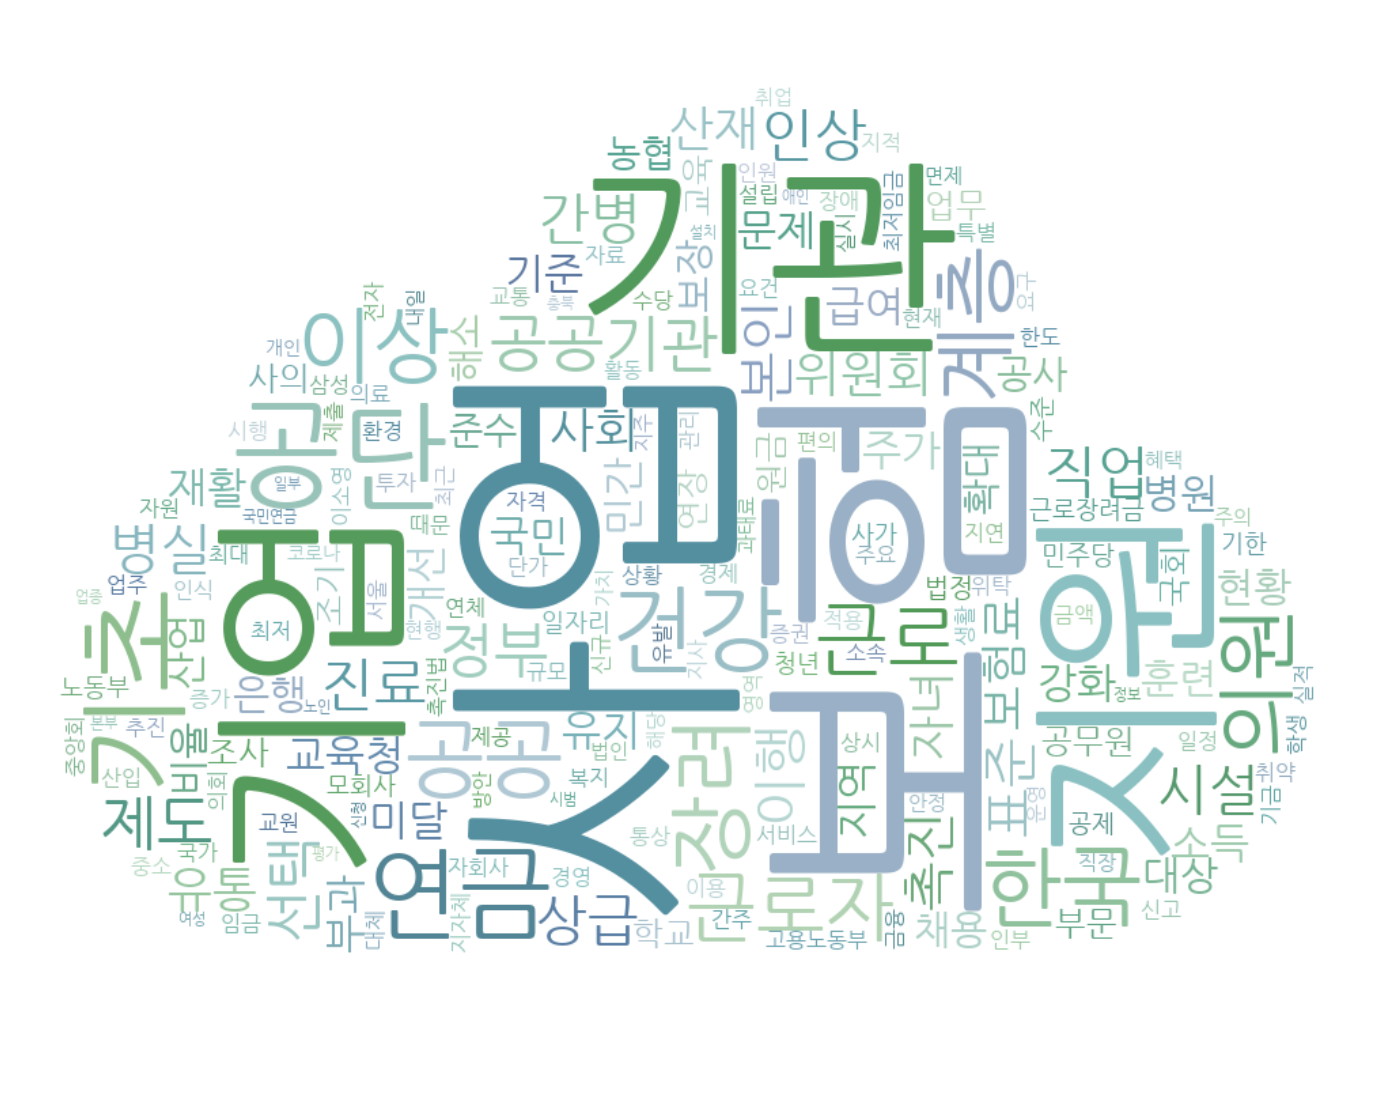

In [84]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation(보간법)
plt.axis('off') # 그래프 눈금을 숨긴다.
plt.show()

## 1-2. 내용 워클

In [85]:
wc = df2020['내용_word']
wc.head(2)

1110    ['고용', '장애인', '수가', '고용의무인원', '의무', '인원', '미달'...
1111    ['장애인', '고용', '고용부담금', '부담금', '2020', '2020년',...
Name: 내용_word, dtype: object

In [36]:
wc.to_csv("2020.txt",encoding='utf-8-sig')

In [86]:
text = open('2020.txt',encoding='utf-8-sig').read()
spwords = set(STOPWORDS)

In [38]:
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

In [87]:
noun = token_konlpy(text)

In [88]:
# 불용어 정의
stop_words = ['고용', '장애인', '고용부','납부','부담', '의무', '경우', '개월', '올해', '지난해', '대신', '이번', '결과']
# 형태소 분석 결과에서 불용어를 제거
tokens_ko = [each_word for each_word in noun if each_word not in stop_words]
tokens_ko

['내용',
 '수가',
 '인원',
 '인원',
 '미달',
 '기초',
 '기초',
 '인상',
 '보험',
 '보험',
 '적용',
 '대상',
 '예술인',
 '포함',
 '국가',
 '지자체',
 '공무원',
 '부문',
 '적용',
 '인원',
 '미달',
 '신고',
 '임산부',
 '유지',
 '유지',
 '가족',
 '가족',
 '직장',
 '직장',
 '환경',
 '환경',
 '조성',
 '지역',
 '중소기업',
 '출산',
 '출산전후',
 '전후',
 '휴가',
 '발생',
 '사업',
 '사업',
 '주의',
 '주의',
 '지원',
 '의자',
 '노무',
 '노무',
 '지원',
 '지원',
 '지원',
 '수준',
 '수준',
 '본인',
 '인부',
 '면제',
 '최대',
 '포함',
 '발달',
 '발달장애',
 '주간',
 '주간',
 '활동',
 '활동',
 '장애',
 '개선',
 '인식',
 '개선',
 '통합',
 '통합',
 '관리',
 '시스템',
 '관리',
 '시스템',
 '고도화',
 '통해',
 '인식',
 '개선',
 '교육',
 '주관',
 '부처',
 '보건',
 '보건복지부',
 '복지',
 '교육부',
 '고용노동부',
 '노동부',
 '기업',
 '분야',
 '정책',
 '실업',
 '실업',
 '보험료',
 '보험료',
 '반환',
 '채용',
 '채용',
 '직무',
 '교육',
 '직무',
 '교육',
 '보조금',
 '자료',
 '확인',
 '모델',
 '모델',
 '복지',
 '직원',
 '건강',
 '관리',
 '임산부',
 '유지',
 '유지',
 '가족',
 '가족',
 '직장',
 '직장',
 '환경',
 '환경',
 '조성',
 '지역',
 '중소기업',
 '출산',
 '출산전후',
 '전후',
 '휴가',
 '발생',
 '사업',
 '사업',
 '주의',
 '주의',
 '지원',
 '의자',
 '노무',
 '노무',
 '지원',
 '미달',
 '사업',
 '강화',
 '기준'

In [89]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(10)

[('사업', 548),
 ('지원', 466),
 ('기업', 347),
 ('보험', 328),
 ('보험료', 296),
 ('기한', 277),
 ('기관', 268),
 ('한국', 256),
 ('지역', 248),
 ('기초', 209)]

In [90]:
# 단어별 출현 횟수가 많은 순서대로 워드클라우드로 표현할 단어를 추출하고 딕셔너리 형태로 만든다.
data = ko.vocab().most_common(200)
tmp_data = dict(data)
tmp_data

{'사업': 548,
 '지원': 466,
 '기업': 347,
 '보험': 328,
 '보험료': 296,
 '기한': 277,
 '기관': 268,
 '한국': 256,
 '지역': 248,
 '기초': 209,
 '공단': 191,
 '처분': 191,
 '체납': 189,
 '원금': 188,
 '산재': 185,
 '제도': 176,
 '연장': 175,
 '연금': 167,
 '정부': 167,
 '직업': 163,
 '유예': 163,
 '코로나': 162,
 '건강': 161,
 '유지': 152,
 '교육청': 143,
 '의원': 138,
 '기준': 136,
 '교육': 135,
 '시설': 133,
 '지방': 132,
 '훈련': 129,
 '보상': 125,
 '환경': 123,
 '산업': 123,
 '근로자': 122,
 '공공': 121,
 '교통': 121,
 '안정': 119,
 '개선': 117,
 '인원': 114,
 '교원': 114,
 '특별': 112,
 '일자리': 110,
 '급여': 108,
 '공무원': 104,
 '위기': 104,
 '부과': 104,
 '촉진': 103,
 '기간': 103,
 '유발': 103,
 '생활': 102,
 '미달': 100,
 '관리': 100,
 '민간': 100,
 '대상': 99,
 '지정': 97,
 '이상': 96,
 '공공기관': 96,
 '재해': 96,
 '계층': 94,
 '표준': 94,
 '본인': 92,
 '시간': 91,
 '업주': 91,
 '남부': 90,
 '준수': 88,
 '업체': 88,
 '집행': 87,
 '사회': 86,
 '피해': 86,
 '신고': 85,
 '요금': 85,
 '수급': 84,
 '취약': 84,
 '위원회': 83,
 '주가': 82,
 '채용': 81,
 '재난': 79,
 '수도': 78,
 '인부': 76,
 '무상': 76,
 '연체': 76,
 '기금': 74,
 '상하': 74,
 '지급': 72,
 '

In [91]:
wc = WordCloud(font_path='NanumGothic.ttf', background_color = 'white', color_func = color_func, max_words = 200, mask = mask) # 워드클라우드 설정
wordcloud = wc.generate_from_frequencies(tmp_data)
wordcloud.words_


{'사업': 1.0,
 '지원': 0.8503649635036497,
 '기업': 0.6332116788321168,
 '보험': 0.5985401459854015,
 '보험료': 0.5401459854014599,
 '기한': 0.5054744525547445,
 '기관': 0.48905109489051096,
 '한국': 0.46715328467153283,
 '지역': 0.45255474452554745,
 '기초': 0.3813868613138686,
 '공단': 0.34854014598540145,
 '처분': 0.34854014598540145,
 '체납': 0.3448905109489051,
 '원금': 0.34306569343065696,
 '산재': 0.3375912408759124,
 '제도': 0.32116788321167883,
 '연장': 0.3193430656934307,
 '연금': 0.30474452554744524,
 '정부': 0.30474452554744524,
 '직업': 0.29744525547445255,
 '유예': 0.29744525547445255,
 '코로나': 0.2956204379562044,
 '건강': 0.2937956204379562,
 '유지': 0.2773722627737226,
 '교육청': 0.26094890510948904,
 '의원': 0.2518248175182482,
 '기준': 0.24817518248175183,
 '교육': 0.24635036496350365,
 '시설': 0.2427007299270073,
 '지방': 0.24087591240875914,
 '훈련': 0.2354014598540146,
 '보상': 0.2281021897810219,
 '환경': 0.22445255474452555,
 '산업': 0.22445255474452555,
 '근로자': 0.22262773722627738,
 '공공': 0.2208029197080292,
 '교통': 0.220802919708

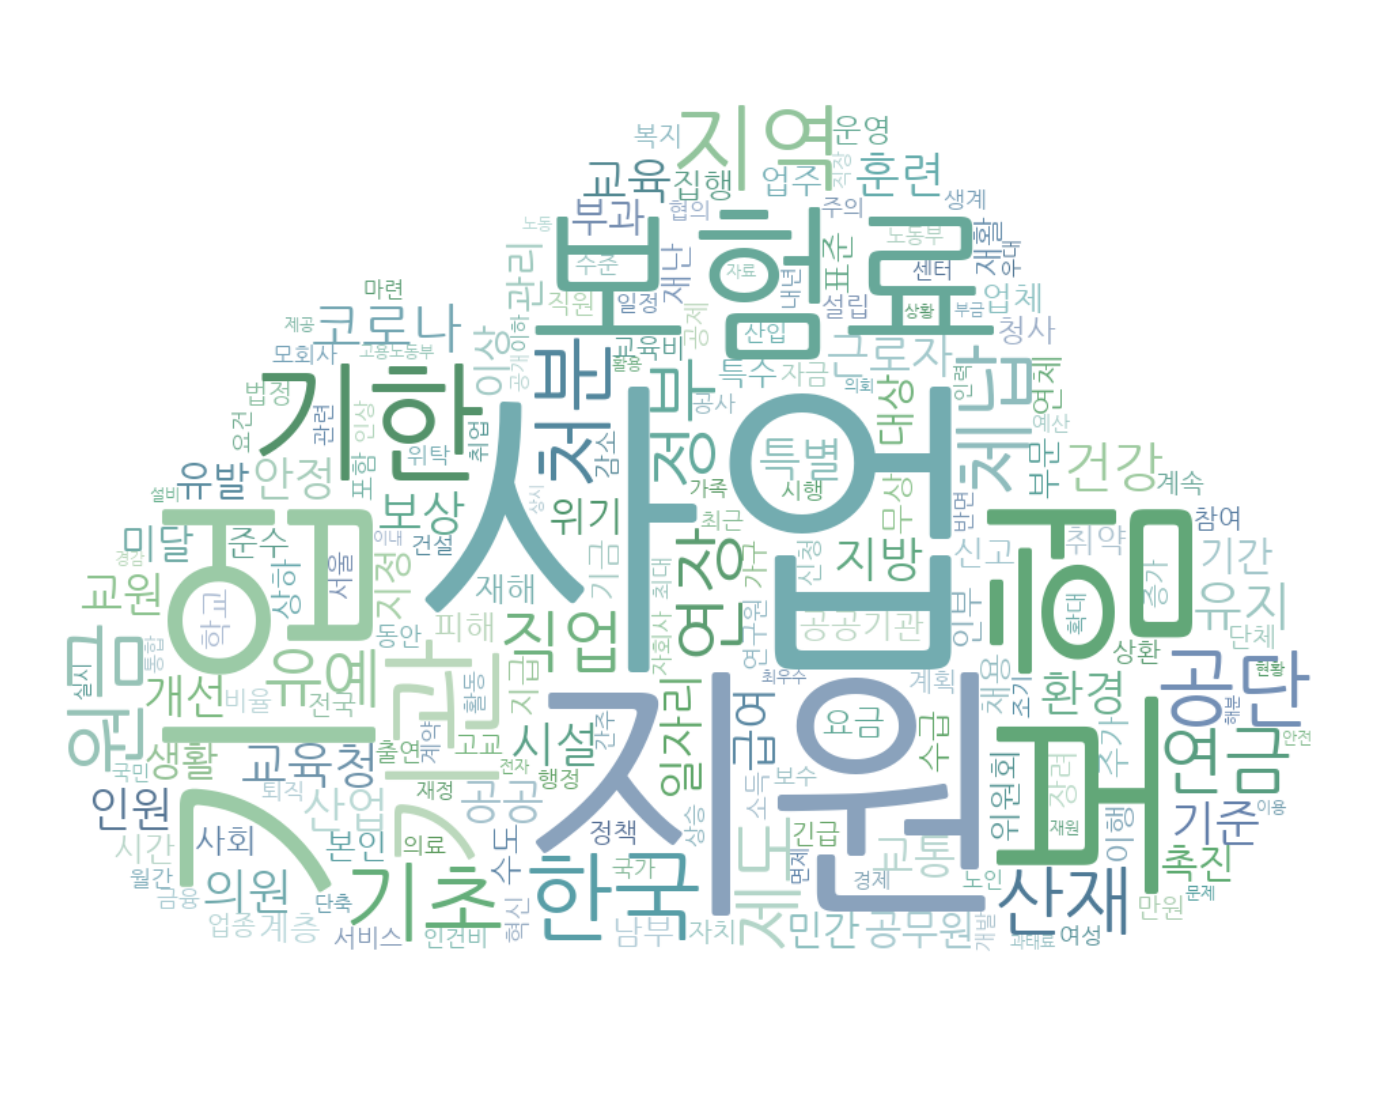

In [92]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation(보간법)
plt.axis('off') # 그래프 눈금을 숨긴다.
plt.show()

## 2-1.장애인고용의무 제목 워클

In [107]:
df = pd.read_csv("워드클라우드장애인고용의무.csv")
wc = df['내용_word']
wc.head(2)

0    ['국가', '지자체', '공공', '공공기관', '기관', '장애인', '의무',...
1    ['서부', '서부발전', '발전', '2018', '2018년', '년', '고졸...
Name: 내용_word, dtype: object

In [108]:
wc.to_csv("장애인고용의무content.txt",encoding='utf-8-sig')

In [109]:
text = open('장애인고용의무content.txt',encoding='utf-8-sig').read()
spwords = set(STOPWORDS)

In [110]:
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

In [111]:
noun = token_konlpy(text)

In [112]:
# 불용어 정의
stop_words = ['고용', '장애인', '부담', '의무', '경우', '개월', '올해', '지난해', '대신', '이번', '결과']
# 형태소 분석 결과에서 불용어를 제거
tokens_ko = [each_word for each_word in noun if each_word not in stop_words]
tokens_ko

['내용',
 '국가',
 '지자체',
 '공공',
 '공공기관',
 '기관',
 '상향',
 '근로자',
 '이상',
 '조정',
 '숙련',
 '고부',
 '가치',
 '직업',
 '직업',
 '교육',
 '훈련',
 '교육',
 '훈련',
 '확대',
 '시행',
 '여성',
 '위기',
 '위기',
 '서부',
 '서부',
 '발전',
 '발전',
 '졸자',
 '지역',
 '지역',
 '인재',
 '인재',
 '국가',
 '국가',
 '유공',
 '유공',
 '사회',
 '약자',
 '비율',
 '비율',
 '초과',
 '실적',
 '실적',
 '유지',
 '공기업',
 '책무',
 '완수',
 '외부',
 '외부',
 '위원',
 '위원',
 '포함',
 '채용',
 '채용',
 '점검',
 '위원회',
 '점검',
 '위원회',
 '일정',
 '규모',
 '사업',
 '시각',
 '시각장애인',
 '안마',
 '마사',
 '시각장애인',
 '권리',
 '침해',
 '최소',
 '필요',
 '헌재',
 '주장',
 '고용부',
 '공공',
 '부문',
 '부문',
 '상향',
 '채용',
 '채용',
 '장려',
 '장려',
 '신설',
 '일자리',
 '지원',
 '확대',
 '코로나',
 '코로나',
 '상황',
 '지속',
 '만큼',
 '현장',
 '모니터링',
 '유지',
 '유지',
 '필요',
 '연내',
 '충족',
 '목표',
 '증진',
 '증진',
 '계획',
 '계획',
 '수립',
 '공무',
 '무직',
 '근로자',
 '근로자',
 '채용',
 '가산',
 '부여',
 '적합',
 '적합',
 '직무',
 '직무',
 '구분',
 '구분',
 '모집',
 '모집',
 '병행',
 '기간',
 '문제',
 '법적',
 '처벌',
 '규정',
 '기업',
 '벌금',
 '실정',
 '권고',
 '사항',
 '불과',
 '제화',
 '제화',
 '세금',
 '약간',
 '혜택',
 '고용노동부',
 '노동부',
 '이행',
 '

In [113]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(10)

[('사업', 1178),
 ('기관', 1099),
 ('기업', 879),
 ('공공', 729),
 ('제도', 686),
 ('공공기관', 592),
 ('지원', 564),
 ('이상', 563),
 ('표준', 554),
 ('근로자', 547)]

In [114]:
# 단어별 출현 횟수가 많은 순서대로 워드클라우드로 표현할 단어를 추출하고 딕셔너리 형태로 만든다.
data = ko.vocab().most_common(200)
tmp_data = dict(data)
tmp_data

{'사업': 1178,
 '기관': 1099,
 '기업': 879,
 '공공': 729,
 '제도': 686,
 '공공기관': 592,
 '지원': 564,
 '이상': 563,
 '표준': 554,
 '근로자': 547,
 '공단': 539,
 '한국': 475,
 '촉진': 465,
 '이행': 431,
 '채용': 428,
 '민간': 419,
 '비율': 415,
 '직업': 402,
 '부문': 389,
 '납부': 381,
 '의원': 376,
 '정부': 375,
 '일자리': 371,
 '교육': 344,
 '확대': 344,
 '사회': 332,
 '재활': 330,
 '고용부': 329,
 '인원': 323,
 '기준': 322,
 '달성': 314,
 '시설': 279,
 '위원회': 275,
 '애인': 263,
 '개선': 260,
 '교육청': 255,
 '구매': 250,
 '업주': 249,
 '장려': 245,
 '증장': 244,
 '지역': 236,
 '공무원': 226,
 '초과': 224,
 '대상': 224,
 '주가': 218,
 '준수': 214,
 '중증': 213,
 '코로나': 211,
 '자회사': 208,
 '정책': 205,
 '복지': 202,
 '상시': 197,
 '노동부': 192,
 '법정': 191,
 '장애': 191,
 '고용노동부': 189,
 '우선': 189,
 '안정': 189,
 '보험': 184,
 '신규': 180,
 '미달': 180,
 '제공': 177,
 '취업': 175,
 '노력': 173,
 '국가': 171,
 '유지': 171,
 '국회': 169,
 '적용': 165,
 '일정': 163,
 '업체': 163,
 '근로': 160,
 '설립': 159,
 '직원': 158,
 '노동': 158,
 '최근': 158,
 '환경': 158,
 '모회사': 156,
 '인식': 155,
 '생산품': 148,
 '병원': 143,
 '차별': 142,
 '훈련': 141

In [117]:
mask = np.array(Image.open('cloud.png'))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [118]:
wc = WordCloud(font_path='NanumGothic.ttf', background_color = 'white', color_func = color_func, max_words = 200, mask = mask) # 워드클라우드 설정
wordcloud = wc.generate_from_frequencies(tmp_data)
wordcloud.words_


{'사업': 1.0,
 '기관': 0.932937181663837,
 '기업': 0.7461799660441426,
 '공공': 0.6188455008488964,
 '제도': 0.5823429541595926,
 '공공기관': 0.5025466893039049,
 '지원': 0.47877758913412566,
 '이상': 0.4779286926994907,
 '표준': 0.4702886247877759,
 '근로자': 0.46434634974533107,
 '공단': 0.45755517826825126,
 '한국': 0.4032258064516129,
 '촉진': 0.39473684210526316,
 '이행': 0.36587436332767403,
 '채용': 0.3633276740237691,
 '민간': 0.35568760611205436,
 '비율': 0.3522920203735144,
 '직업': 0.34125636672325976,
 '부문': 0.3302207130730051,
 '납부': 0.3234295415959253,
 '의원': 0.31918505942275044,
 '정부': 0.31833616298811546,
 '일자리': 0.3149405772495755,
 '교육': 0.2920203735144312,
 '확대': 0.2920203735144312,
 '사회': 0.28183361629881154,
 '재활': 0.2801358234295416,
 '고용부': 0.27928692699490665,
 '인원': 0.27419354838709675,
 '기준': 0.2733446519524618,
 '달성': 0.266553480475382,
 '시설': 0.23684210526315788,
 '위원회': 0.233446519524618,
 '애인': 0.2232597623089983,
 '개선': 0.22071307300509338,
 '교육청': 0.2164685908319185,
 '구매': 0.2122241086587436

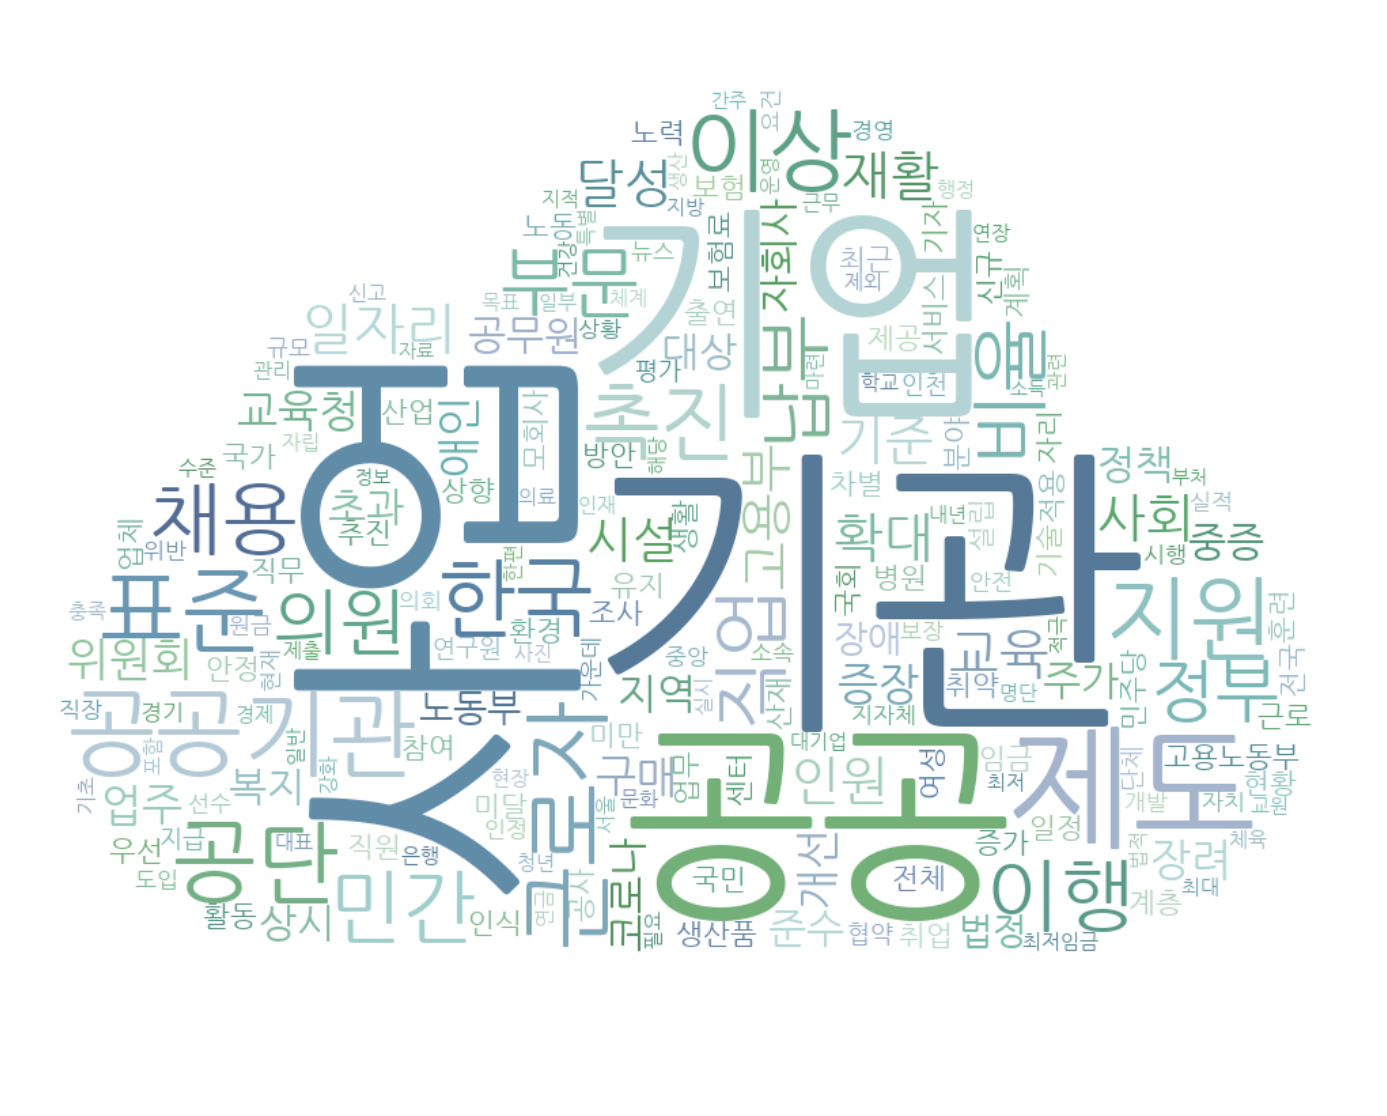

In [119]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation(보간법)
plt.axis('off') # 그래프 눈금을 숨긴다.
plt.show()

## 2-1.장애인고용의무 내용 워클

In [162]:
df = pd.read_csv("워드클라우드장애인고용의무.csv")
wc = df['내용_word']
wc.head(2)

0    ['국가', '지자체', '공공', '공공기관', '기관', '장애인', '의무',...
1    ['서부', '서부발전', '발전', '2018', '2018년', '년', '고졸...
Name: 내용_word, dtype: object

In [163]:
wc.to_csv("장애인고용의무content.txt",encoding='utf-8-sig')

In [148]:
text = open('장애인고용의무content.txt',encoding='utf-8-sig').read()
spwords = set(STOPWORDS)

In [ ]:
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

In [149]:
noun = token_konlpy(text)

In [150]:
# 불용어 정의
stop_words = ['고용', '장애인', '부담', '의무', '경우', '개월', '올해', '지난해', '대신', '이번', '결과']
# 형태소 분석 결과에서 불용어를 제거한다.
# 형태소 분석 결과(tokens_ko)의 각 단어가 each_word에 저장되며 반복한다.
# 이때, each_word에 저장된 단어가 stop_words에 포함되지 않는 단어만 리스트로 만들어 형태소 분석 결과로 저장한다.
tokens_ko = [each_word for each_word in noun if each_word not in stop_words]
tokens_ko

['내용',
 '국가',
 '지자체',
 '공공',
 '공공기관',
 '기관',
 '상향',
 '근로자',
 '이상',
 '조정',
 '숙련',
 '고부',
 '가치',
 '직업',
 '직업',
 '교육',
 '훈련',
 '교육',
 '훈련',
 '확대',
 '시행',
 '여성',
 '위기',
 '위기',
 '서부',
 '서부',
 '발전',
 '발전',
 '졸자',
 '지역',
 '지역',
 '인재',
 '인재',
 '국가',
 '국가',
 '유공',
 '유공',
 '사회',
 '약자',
 '비율',
 '비율',
 '초과',
 '실적',
 '실적',
 '유지',
 '공기업',
 '책무',
 '완수',
 '외부',
 '외부',
 '위원',
 '위원',
 '포함',
 '채용',
 '채용',
 '점검',
 '위원회',
 '점검',
 '위원회',
 '일정',
 '규모',
 '사업',
 '시각',
 '시각장애인',
 '안마',
 '마사',
 '시각장애인',
 '권리',
 '침해',
 '최소',
 '필요',
 '헌재',
 '주장',
 '고용부',
 '공공',
 '부문',
 '부문',
 '상향',
 '채용',
 '채용',
 '장려',
 '장려',
 '신설',
 '일자리',
 '지원',
 '확대',
 '코로나',
 '코로나',
 '상황',
 '지속',
 '만큼',
 '현장',
 '모니터링',
 '유지',
 '유지',
 '필요',
 '연내',
 '충족',
 '목표',
 '증진',
 '증진',
 '계획',
 '계획',
 '수립',
 '공무',
 '무직',
 '근로자',
 '근로자',
 '채용',
 '가산',
 '부여',
 '적합',
 '적합',
 '직무',
 '직무',
 '구분',
 '구분',
 '모집',
 '모집',
 '병행',
 '기간',
 '문제',
 '법적',
 '처벌',
 '규정',
 '기업',
 '벌금',
 '실정',
 '권고',
 '사항',
 '불과',
 '제화',
 '제화',
 '세금',
 '약간',
 '혜택',
 '고용노동부',
 '노동부',
 '이행',
 '

In [151]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(10)

[('사업', 1178),
 ('기관', 1099),
 ('기업', 879),
 ('공공', 729),
 ('제도', 686),
 ('공공기관', 592),
 ('지원', 564),
 ('이상', 563),
 ('표준', 554),
 ('근로자', 547)]

In [152]:
# 단어별 출현 횟수가 많은 순서대로 워드클라우드로 표현할 단어를 추출하고 딕셔너리 형태로 만든다.
data = ko.vocab().most_common(500)
tmp_data = dict(data)
tmp_data

{'사업': 1178,
 '기관': 1099,
 '기업': 879,
 '공공': 729,
 '제도': 686,
 '공공기관': 592,
 '지원': 564,
 '이상': 563,
 '표준': 554,
 '근로자': 547,
 '공단': 539,
 '한국': 475,
 '촉진': 465,
 '이행': 431,
 '채용': 428,
 '민간': 419,
 '비율': 415,
 '직업': 402,
 '부문': 389,
 '납부': 381,
 '의원': 376,
 '정부': 375,
 '일자리': 371,
 '교육': 344,
 '확대': 344,
 '사회': 332,
 '재활': 330,
 '고용부': 329,
 '인원': 323,
 '기준': 322,
 '달성': 314,
 '시설': 279,
 '위원회': 275,
 '애인': 263,
 '개선': 260,
 '교육청': 255,
 '구매': 250,
 '업주': 249,
 '장려': 245,
 '증장': 244,
 '지역': 236,
 '공무원': 226,
 '초과': 224,
 '대상': 224,
 '주가': 218,
 '준수': 214,
 '중증': 213,
 '코로나': 211,
 '자회사': 208,
 '정책': 205,
 '복지': 202,
 '상시': 197,
 '노동부': 192,
 '법정': 191,
 '장애': 191,
 '고용노동부': 189,
 '우선': 189,
 '안정': 189,
 '보험': 184,
 '신규': 180,
 '미달': 180,
 '제공': 177,
 '취업': 175,
 '노력': 173,
 '국가': 171,
 '유지': 171,
 '국회': 169,
 '적용': 165,
 '일정': 163,
 '업체': 163,
 '근로': 160,
 '설립': 159,
 '직원': 158,
 '노동': 158,
 '최근': 158,
 '환경': 158,
 '모회사': 156,
 '인식': 155,
 '생산품': 148,
 '병원': 143,
 '차별': 142,
 '훈련': 141

In [153]:
wc = WordCloud(font_path='NanumGothic.ttf', background_color = 'white', color_func = color_func, max_words = 2000, mask = mask) # 워드클라우드 설정
wordcloud = wc.generate_from_frequencies(tmp_data)
wordcloud.words_


{'사업': 1.0,
 '기관': 0.932937181663837,
 '기업': 0.7461799660441426,
 '공공': 0.6188455008488964,
 '제도': 0.5823429541595926,
 '공공기관': 0.5025466893039049,
 '지원': 0.47877758913412566,
 '이상': 0.4779286926994907,
 '표준': 0.4702886247877759,
 '근로자': 0.46434634974533107,
 '공단': 0.45755517826825126,
 '한국': 0.4032258064516129,
 '촉진': 0.39473684210526316,
 '이행': 0.36587436332767403,
 '채용': 0.3633276740237691,
 '민간': 0.35568760611205436,
 '비율': 0.3522920203735144,
 '직업': 0.34125636672325976,
 '부문': 0.3302207130730051,
 '납부': 0.3234295415959253,
 '의원': 0.31918505942275044,
 '정부': 0.31833616298811546,
 '일자리': 0.3149405772495755,
 '교육': 0.2920203735144312,
 '확대': 0.2920203735144312,
 '사회': 0.28183361629881154,
 '재활': 0.2801358234295416,
 '고용부': 0.27928692699490665,
 '인원': 0.27419354838709675,
 '기준': 0.2733446519524618,
 '달성': 0.266553480475382,
 '시설': 0.23684210526315788,
 '위원회': 0.233446519524618,
 '애인': 0.2232597623089983,
 '개선': 0.22071307300509338,
 '교육청': 0.2164685908319185,
 '구매': 0.2122241086587436

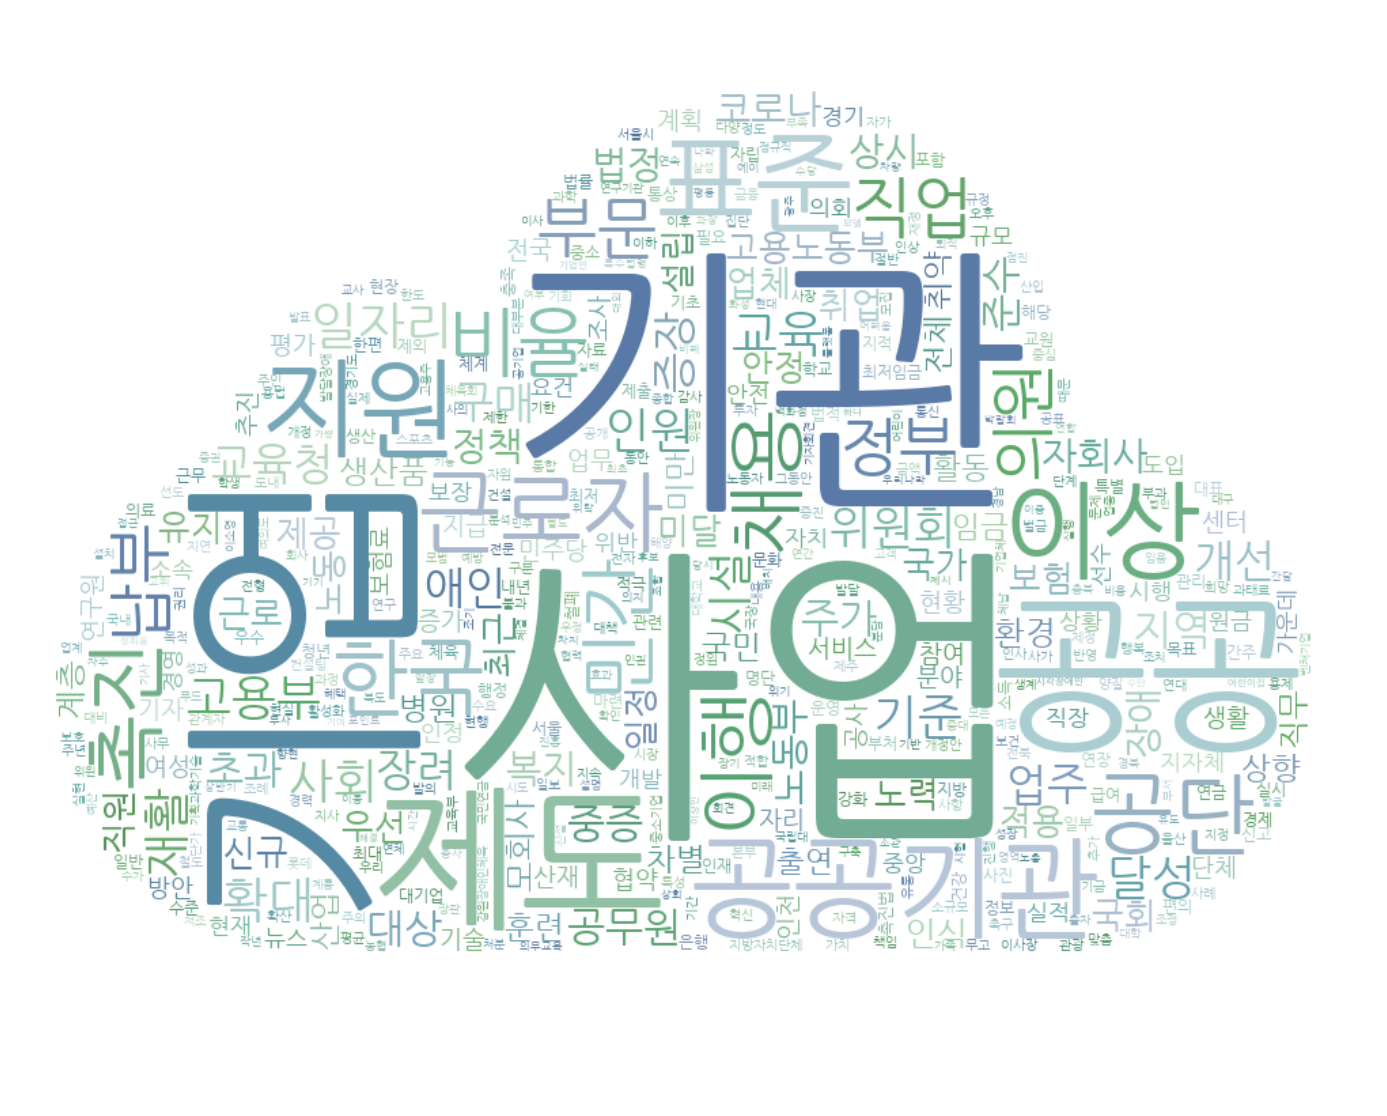

In [154]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation(보간법)
plt.axis('off') # 그래프 눈금을 숨긴다.
plt.show()